In [1]:
%load_ext autoreload
%autoreload 2

import json
import os
import pandas as pd
import papermill as pm
import scrapbook as sb
import uuid

pd.set_option('display.max_colwidth', None)

In [2]:
project_folder = "diygenomics-projects"
sub_category = "DATA"
work_bucket = "genomes"

input_file = 'citizen_2_short_llumina.csv'

In [5]:
data_path = os.getenv('DATA_PATH')
file_path = lambda *args: os.path.join(data_path, project_folder, sub_category, work_bucket, *args)

In [10]:
df = pd.read_csv(file_path(input_file), skiprows=[0])

In [25]:
df.columns

Index(['Chromosome', 'Position', 'Allele Frequency', 'Gene', 'Transcript',
       'DNA Change', 'Amino Acid Change', 'Allele State', 'dbSNPID',
       'Classification_1', 'Associated Condition_1', 'Inheritance Mode_1',
       'PMIDs_1', 'Classification_2', 'Associated Condition_2',
       'Inheritance Mode_2'],
      dtype='object')

In [13]:
tmp_df = df.iloc[:, :8]
tmp_df

,Chromosome,Position,Allele Frequency,Gene,Transcript,DNA Change,Amino Acid Change,Allele State
0,12,53703021,0.925366,AAAS,NM_015665.5,c.855C>T,F285,Homozygous
1,16,70286550,0.046703,AARS,NM_001605.2,c.*74A>T,NaN,Heterozygous
2,16,70287177,0.880037,AARS,NM_001605.2,c.2715T>C,V905,Homozygous
3,16,70303580,0.461996,AARS,NM_001605.2,c.903C>T,H301,Homozygous
4,6,44266925,0.886905,AARS2,NM_020745.3,c.*1359A>G,NaN,Homozygous
...,...,...,...,...,...,...,...,...
5370,16,88505734,0.988553,ZNF469,NM_001127464.1,c.11772C>T,S3924,Homozygous
5371,16,88505748,0.250458,ZNF469,NM_001127464.1,c.*8G>A,NaN,Heterozygous
5372,16,88506358,0.946886,ZNF469,NM_001127464.1,c.*618T>G,NaN,Homozygous
5373,16,88506528,0.990385,ZNF469,NM_001127464.1,c.*788G>A,NaN,Homozygous


In [26]:
tmp_df = df.iloc[:, -8:]
tmp_df

,dbSNPID,Classification_1,Associated Condition_1,Inheritance Mode_1,PMIDs_1,Classification_2,Associated Condition_2,Inheritance Mode_2
0,rs1546808,Benign,Achalasia-Addisonianism-Alacrima Syndrome,RECESSIVE,NaN,NaN,NaN,NaN
1,rs11537663,Unknown Significance,"Charcot-Marie-Tooth, Type 2",DOMINANT,NaN,NaN,NaN,NaN
2,rs4081753,Benign,"Charcot-Marie-Tooth, Type 2",DOMINANT,NaN,NaN,NaN,NaN
3,rs2070203,Benign,"Charcot-Marie-Tooth, Type 2",NaN,NaN,NaN,NaN,NaN
4,rs534416,Benign,Combined Oxidative Phosphorylation Deficiency,RECESSIVE,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5370,rs4782362,Benign,Brittle Cornea Syndrome,RECESSIVE,NaN,NaN,NaN,NaN
5371,rs45504291,Benign,Brittle Cornea Syndrome,RECESSIVE,NaN,NaN,NaN,NaN
5372,rs3859020,Benign,Brittle Cornea Syndrome,RECESSIVE,NaN,NaN,NaN,NaN
5373,rs3894713,Benign,Brittle Cornea Syndrome,RECESSIVE,NaN,NaN,NaN,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5375 entries, 0 to 5374
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Chromosome              5375 non-null   object 
 1   Position                5375 non-null   int64  
 2   Allele Frequency        5148 non-null   float64
 3   Gene                    5375 non-null   object 
 4   Transcript              5375 non-null   object 
 5   DNA Change              5375 non-null   object 
 6   Amino Acid Change       2220 non-null   object 
 7   Allele State            5375 non-null   object 
 8   dbSNPID                 5308 non-null   object 
 9   Classification_1        5375 non-null   object 
 10  Associated Condition_1  5375 non-null   object 
 11  Inheritance Mode_1      5317 non-null   object 
 12  PMIDs_1                 153 non-null    object 
 13  Classification_2        1288 non-null   object 
 14  Associated Condition_2  1288 non-null   

In [16]:
df.describe()

,Position,Allele Frequency
count,5.375000e+03,5148.000000
mean,7.890134e+07,0.481517
std,6.020409e+07,0.293727
min,2.716380e+05,0.000000
25%,3.279494e+07,0.228022
50%,6.408124e+07,0.468865
75%,1.164247e+08,0.723443
max,2.476123e+08,1.000000


In [17]:
df['Gene'].value_counts()

Gene
TTN        52
SH3TC2     28
C2orf71    26
EYS        24
IYD        24
           ..
PTH1R       1
PTH         1
ERCC4       1
ESCO2       1
AAAS        1
Name: count, Length: 1237, dtype: int64

In [18]:
df['Chromosome'].value_counts()

Chromosome
2     546
1     510
5     373
17    330
11    319
6     304
12    303
3     289
16    254
9     240
10    238
4     237
8     219
7     202
14    177
19    172
15    153
13    150
18     95
22     93
20     92
21     68
X      11
Name: count, dtype: int64

In [19]:
df.isnull().sum()

Chromosome                   0
Position                     0
Allele Frequency           227
Gene                         0
Transcript                   0
DNA Change                   0
Amino Acid Change         3155
Allele State                 0
dbSNPID                     67
Classification_1             0
Associated Condition_1       0
Inheritance Mode_1          58
PMIDs_1                   5222
Classification_2          4087
Associated Condition_2    4087
Inheritance Mode_2        4105
dtype: int64

<Axes: >

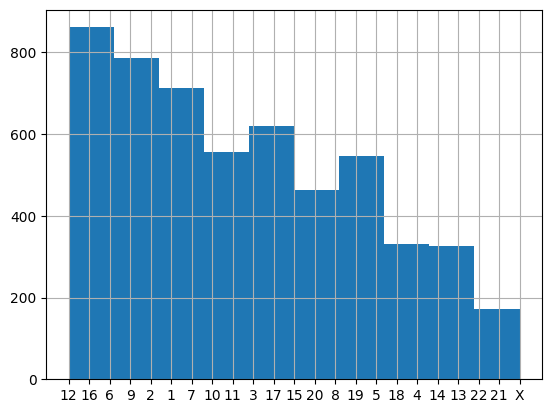

In [21]:
df['Chromosome'].hist()

In [24]:
pd.crosstab(df['Gene'], df['Chromosome'])

Chromosome,1,10,11,12,13,14,15,16,17,18,...,21,22,3,4,5,6,7,8,9,X
Gene,,,,,,,,,,,,,,,,,,,,,
AAAS,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AARS,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
AARS2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,10,0,0,0,0
ABAT,0,0,0,0,0,0,0,16,0,0,...,0,0,0,0,0,0,0,0,0,0
ABCA1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZAP70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEB2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZFYVE26,0,0,0,0,0,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# list(df['Gene'].unique())
df['Gene'][df['Gene'].str.contains('CG')].unique()

array(['ABCG5', 'ABCG8', 'FANCG', 'LHCGR', 'PRKCG', 'SGCG'], dtype=object)